# Convolutional Neural Network template

## ======= Construct CNN ======= 

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

def build_classifier(_optimizer):
    #initialize 
    classifier = Sequential()
    #Convolution
    classifier.add(Conv2D(20, (3, 3), input_shape = (30, 30, 3), activation = 'relu'))
    #pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    #more convolution & pooling layers?
    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    #flatten
    classifier.add(Flatten())
    #ANN (deeper hidden layers? add here)
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    #compile
    classifier.compile(optimizer = _optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = build_classifier('adam')

for layer in classifier.layers:
    print (layer.name, layer.input_shape, '-->', layer.output_shape)
print (classifier.summary())

conv2d_3 (None, 30, 30, 3) --> (None, 28, 28, 20)
max_pooling2d_3 (None, 28, 28, 20) --> (None, 14, 14, 20)
conv2d_4 (None, 14, 14, 20) --> (None, 12, 12, 32)
max_pooling2d_4 (None, 12, 12, 32) --> (None, 6, 6, 32)
flatten_2 (None, 6, 6, 32) --> (None, 1152)
dense_3 (None, 1152) --> (None, 30)
dense_4 (None, 30) --> (None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        5792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (F

## ========= Fitting the CNN ===========

In [3]:
from keras.preprocessing.image import ImageDataGenerator
#I will NOT choose parameters that will cause too much computation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (30, 30),
                                                 batch_size = 10,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (30, 30),
                                            batch_size = 10,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = training_set.samples,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = test_set.samples)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/10
2000/2000 [==============================] - 171s 86ms/step - loss: 0.6156 - acc: 0.6459 - val_loss: 0.5408 - val_acc: 0.7300
Epoch 2/10
2000/2000 [==============================] - 204s 102ms/step - loss: 0.4956 - acc: 0.7554 - val_loss: 0.5434 - val_acc: 0.7575
Epoch 3/10
2000/2000 [==============================] - 121s 61ms/step - loss: 0.4143 - acc: 0.8075 - val_loss: 0.6363 - val_acc: 0.7200
Epoch 4/10
2000/2000 [==============================] - 134s 67ms/step - loss: 0.3475 - acc: 0.8427 - val_loss: 0.6159 - val_acc: 0.7450
Epoch 5/10
2000/2000 [==============================] - 175s 87ms/step - loss: 0.2830 - acc: 0.8791 - val_loss: 0.7822 - val_acc: 0.7475
Epoch 6/10
2000/2000 [==============================] - 106s 53ms/step - loss: 0.2239 - acc: 0.9074 - val_loss: 0.7125 - val_acc: 0.7325
Epoch 7/10
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1847 - acc: 0

## ======== Visualize the loss ==========

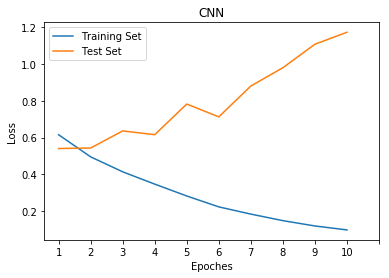

In [4]:
import matplotlib.pyplot as plt
import numpy as np
num_epoches = len(history.history['loss'])
plt.plot (history.history['loss'], label = 'Training Set')
plt.plot (history.history['val_loss'], label = 'Test Set')
plt.xticks(np.arange(0, 1+num_epoches), labels = [str(i+1) for i in range(num_epoches)])
plt.title('CNN')
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend()
plt.show() #does not look good for the test set. 

## ======== Making new predictions =========

In [7]:
import numpy as np
from keras.preprocessing import image

print (training_set.class_indices)
for i in range(1,3):
    test_image = image.load_img('dataset/single_prediction/cat_or_dog_'+str(i)+'.jpg', target_size = (30, 30))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    result = (result>0.5)

    prediction = [key for (key, value) in training_set.class_indices.items() if value == result][0]

    print ('Predict:', prediction)

{'cats': 0, 'dogs': 1}
Predict: dogs
Predict: cats
